In [1]:
import numpy as np
#from scipy.stats import wishart
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

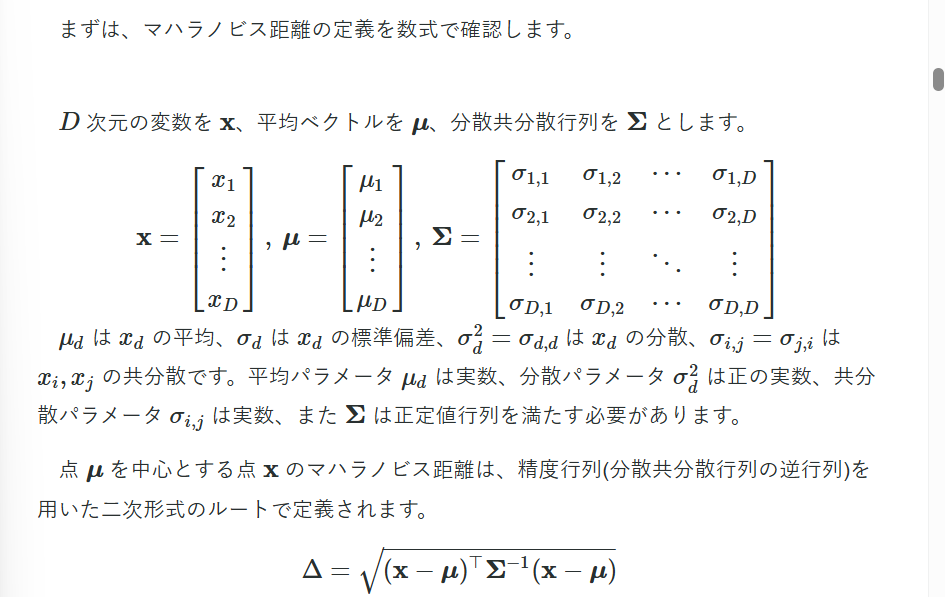

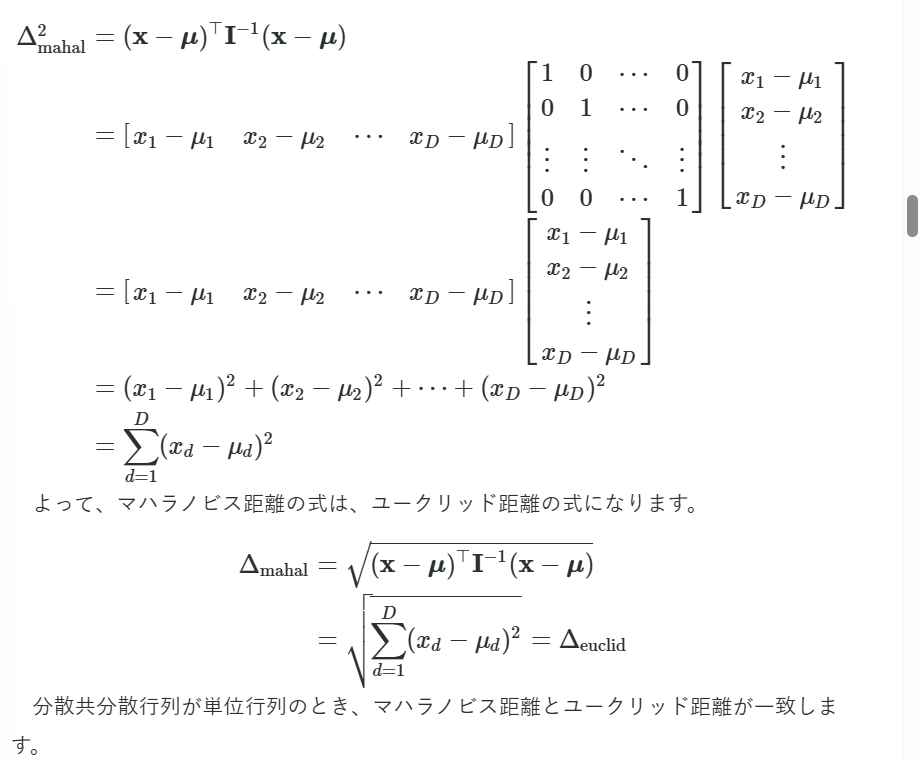

In [2]:
# 次元数を指定:(固定)
D = 3

# 平均ベクトルを指定
mu_d = np.array([0.0, 0.0, 0.0])

# 分散共分散行列を指定
sigma_dd = np.array(
    [[16.0, -1.5, 0.0], 
     [-1.5, 9.0, 0.9], 
     [0.0, 0.9, 4.0]]
)
#sigma_dd = np.diag(np.ones(D)) # 単位行列
#sigma_dd = wishart.rvs(df=D, scale=np.diag(np.ones(D)), size=1) # ウィシャート乱数
print(sigma_dd.round(2))

[[16.  -1.5  0. ]
 [-1.5  9.   0.9]
 [ 0.   0.9  4. ]]


In [3]:
# 各軸の範囲の調整値を指定
sgm_num = 3.0

# 各軸の範囲を設定
x0_min = mu_d[0] - sgm_num * np.sqrt(sigma_dd[0, 0])
x0_max = mu_d[0] + sgm_num * np.sqrt(sigma_dd[0, 0])
x1_min = mu_d[1] - sgm_num * np.sqrt(sigma_dd[1, 1])
x1_max = mu_d[1] + sgm_num * np.sqrt(sigma_dd[1, 1])
x2_min = mu_d[2] - sgm_num * np.sqrt(sigma_dd[2, 2])
x2_max = mu_d[2] + sgm_num * np.sqrt(sigma_dd[2, 2])
print(x0_min.round(2), x0_max.round(2))
print(x1_min.round(2), x1_max.round(2))
print(x2_min.round(2), x2_max.round(2))

# 各軸の値を作成
x0 = np.linspace(start=x0_min, stop=x0_max, num=50) # 0軸方向の点の数を指定
x1 = np.linspace(start=x1_min, stop=x1_max, num=50) # 1軸方向の点の数を指定
x2 = np.linspace(start=x2_min, stop=x2_max, num=100) # 2軸方向の線の数を指定
print(x0[:5].round(2))
print(x1[:5].round(2))
print(x2[:5].round(2))

# 0・1軸の格子点を作成
X0, X1 = np.meshgrid(x0, x1)
print(X0[:5, :5].round(2))
print(X1[:5, :5].round(2))

# 0・1軸の形状を設定
grid_shape = X0.shape
grid_size  = X0.size
print(grid_shape)
print(grid_size)

-12.0 12.0
-9.0 9.0
-6.0 6.0
[-12.   -11.51 -11.02 -10.53 -10.04]
[-9.   -8.63 -8.27 -7.9  -7.53]
[-6.   -5.88 -5.76 -5.64 -5.52]
[[-12.   -11.51 -11.02 -10.53 -10.04]
 [-12.   -11.51 -11.02 -10.53 -10.04]
 [-12.   -11.51 -11.02 -10.53 -10.04]
 [-12.   -11.51 -11.02 -10.53 -10.04]
 [-12.   -11.51 -11.02 -10.53 -10.04]]
[[-9.   -9.   -9.   -9.   -9.  ]
 [-8.63 -8.63 -8.63 -8.63 -8.63]
 [-8.27 -8.27 -8.27 -8.27 -8.27]
 [-7.9  -7.9  -7.9  -7.9  -7.9 ]
 [-7.53 -7.53 -7.53 -7.53 -7.53]]
(50, 50)
2500


In [4]:
# 精度行列を計算
inv_sigma_dd = np.linalg.inv(sigma_dd)

# 高さごとに処理
dist_arr = np.tile(np.nan, reps=(x2.size, grid_size)) # 受け皿を初期化
for i in range(x2.size):

    # 座標を作成
    X = np.stack([X0.flatten(), X1.flatten(), x2[i].repeat(grid_size)], axis=1)
    
    # マハラノビス距離を計算
    dist_vec = np.array(
        [np.sqrt((x_d - mu_d).T @ inv_sigma_dd @ (x_d - mu_d)) for x_d in X]
    )

    # 距離を格納
    dist_arr[i] = dist_vec.copy()
print(dist_arr[:5, :5].round(2))
print(dist_arr.shape)

[[5.19 5.11 5.03 4.95 4.88]
 [5.16 5.08 5.   4.92 4.85]
 [5.13 5.05 4.97 4.89 4.82]
 [5.1  5.02 4.94 4.86 4.79]
 [5.07 4.99 4.91 4.83 4.76]]
(100, 2500)


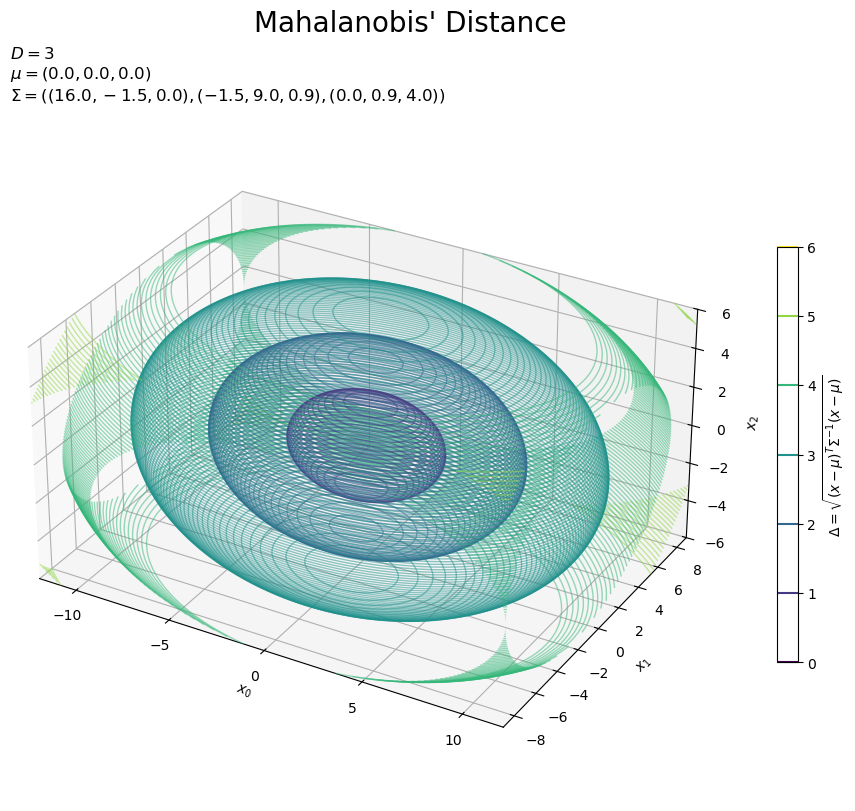

In [10]:
# グラデーションの範囲を設定
dist_min = 0.0
dist_max = np.ceil(dist_arr.max())

# 等高線の位置を指定
dist_levels = np.linspace(start=dist_min, stop=dist_max, num=7) # 線の数を指定

# 軸サイズを設定
x0_size = x0_max - x0_min
x1_size = x1_max - x1_min
x2_size = x2_max - x2_min

# ラベル用の文字列を作成
def_label = '$\\Delta = \\sqrt{(x - \\mu)^{T} \\Sigma^{-1} (x - \\mu)}$'
mu_str    = '(' + ', '.join(str(val.round(2)) for val in mu_d) + ')'
sigma_str = '(' + ', '.join('(' + ', '.join(str(val.round(2)) for val in vec) + ')' for vec in sigma_dd) + ')'
param_label  = '$D = 3$\n'
param_label += '$\\mu = ' + mu_str + '$\n'
param_label += '$\\Sigma = ' + sigma_str + '$'

# 3Dマハラノビス距離を作図
fig, ax = plt.subplots(figsize=(9, 8), dpi=100, facecolor='white', constrained_layout=True, 
                       subplot_kw={'projection': '3d'})
cs = ax.contour(X0, X1, np.linspace(dist_min, dist_max, num=grid_size).reshape(grid_shape), 
                cmap='viridis', vmin=dist_min, vmax=dist_max, levels=dist_levels) # カラーバー表示用のダミー
fig.colorbar(cs, ax=ax, shrink=0.6, pad=0.1, label=def_label)
ax.cla() # カラーバー表示用
for i in range(x2.size):
    ax.contour(X0, X1, dist_arr[i].reshape(grid_shape), offset=x2[i], 
               cmap='viridis', vmin=dist_min, vmax=dist_max, levels=dist_levels, alpha=0.5, 
               linewidths=1) # 等高線
ax.set_xlim(xmin=x0_min, xmax=x0_max)
ax.set_ylim(ymin=x1_min, ymax=x1_max)
ax.set_zlim(zmin=x2_min, zmax=x2_max)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$x_2$')
ax.set_title(param_label, loc='left')
fig.suptitle("Mahalanobis' Distance", fontsize=20)
ax.set_box_aspect([1.0, x1_size/x0_size, x2_size/x0_size])
#ax.view_init(elev=90, azim=270) # 0・1軸平面
#ax.view_init(elev=0, azim=270) # 0・2軸平面
#ax.view_init(elev=0, azim=0) # 1・2軸平面
plt.show()